In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.DataFrame({
    "A": (10, 20, 30, 40, 50),
    "B": (2, 4, 6, 8, 10)
})
df

,A,B
0,10,2
1,20,4
2,30,6
3,40,8
4,50,10


In [3]:
X=df[["A"]]
y=df["B"]

print(X)
print(y)

    A
0  10
1  20
2  30
3  40
4  50
0     2
1     4
2     6
3     8
4    10
Name: B, dtype: int64


In [4]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [5]:
inp = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
inp

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [6]:
predictions = model.predict(X)

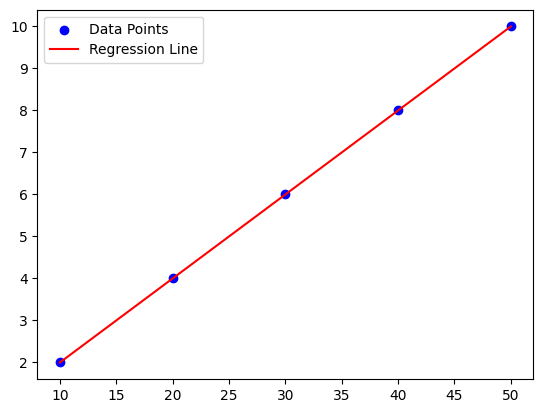

In [7]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.legend()
plt.show()

In [8]:
import torch

class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [9]:
torch_model = MyModel()
torch_pred = torch_model(torch.Tensor(inp))
torch_pred

tensor([[-0.2684],
        [-1.1308],
        [-1.9932],
        [-2.8557],
        [-3.7181]], grad_fn=<AddmmBackward0>)

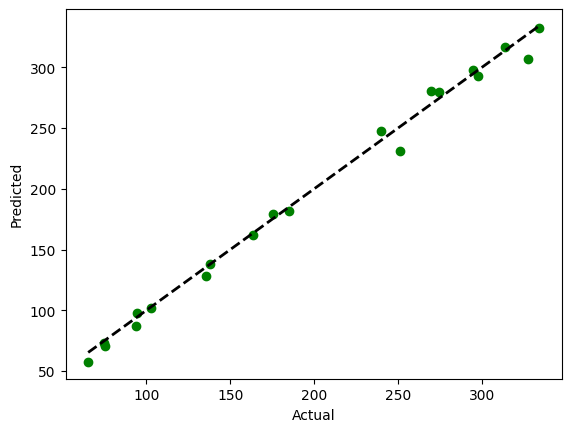

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 50 + 30 * X + np.random.randn(100, 1) * 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# Multiple linear regression example (3 features)
np.random.seed(0)

# Synthetic data
n_samples = 200
X_multi = np.random.rand(n_samples, 3) * 10  # three features
true_coefs = np.array([4.5, -2.0, 3.0])
true_intercept = 10.0
y_multi = true_intercept + X_multi.dot(true_coefs) + np.random.randn(n_samples) * 5  # add noise

# Optional: put into a DataFrame for inspection
feature_names = ["feat1", "feat2", "feat3"]
df_multi = pd.DataFrame(X_multi, columns=feature_names)
df_multi["target"] = y_multi
df_multi.head()

# Train/test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Fit linear regression
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

# Predictions and evaluation
y_pred_m = model_multi.predict(X_test_m)
mse = mean_squared_error(y_test_m, y_pred_m)
r2 = r2_score(y_test_m, y_pred_m)

print("Intercept:", model_multi.intercept_)
print("Coefficients:", dict(zip(feature_names, model_multi.coef_)))
print(f"MSE: {mse:.3f}, R^2: {r2:.3f}")

# Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test_m, y_pred_m, alpha=0.7)
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Multiple Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

# Bar plot of learned coefficients vs true coefficients
xpos = np.arange(len(feature_names))
width = 0.35
plt.figure(figsize=(6,4))
plt.bar(xpos - width/2, true_coefs, width, label="True coefs")
plt.bar(xpos + width/2, model_multi.coef_, width, label="Estimated coefs")
plt.xticks(xpos, feature_names)
plt.ylabel("Coefficient value")
plt.legend()
plt.title("True vs Estimated Coefficients")
plt.show()